<a href="https://colab.research.google.com/github/antonio2505/Data_Science_Business_CS/blob/main/Code_to_predict_stock_market_price_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CODE TO PREDICT STOCK MARKET PRICE




# PROBLEM STATEMENT

- This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.


# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASET

In [2]:
from google.colab import files
uploaded = files.upload()

Saving S&P500_Stock_Data.csv to S&P500_Stock_Data.csv


In [3]:
stock = pd.read_csv('S&P500_Stock_Data.csv')

In [4]:
stock

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
...,...,...,...
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981


In [5]:
stock.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [6]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


In [7]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [10]:
stock['S&P 500 Price'].max()

3000.0

In [11]:
stock[stock['S&P 500 Price']==3000.0]

,Interest Rates,Employment,S&P 500 Price
647,2.854089,58.407543,3000.0


# STEP #2: VISUALIZE DATASET

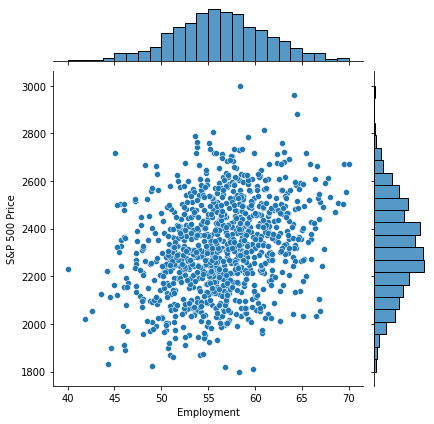

In [12]:
sns.jointplot(x='Employment', y='S&P 500 Price', data=stock)

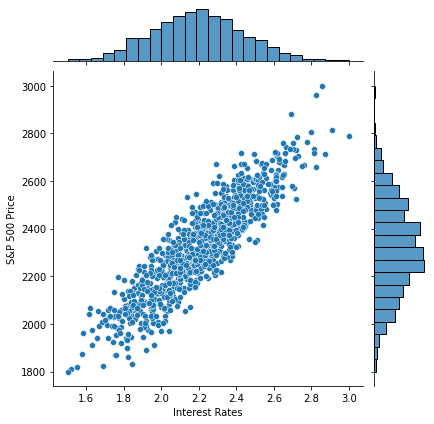

In [13]:
sns.jointplot(x='Interest Rates', y='S&P 500 Price', data=stock)

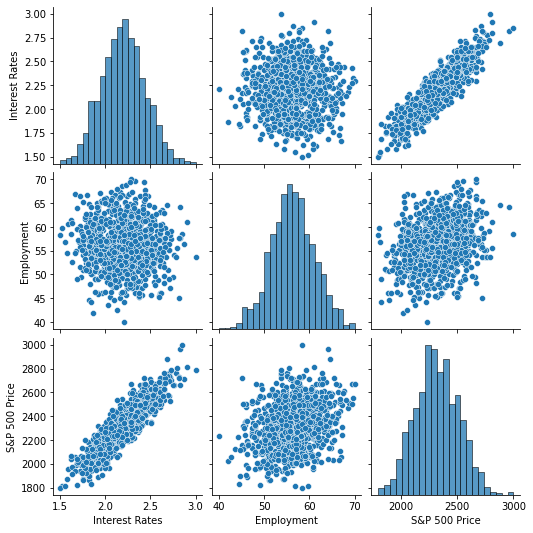

In [14]:
sns.pairplot(stock)

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [16]:
x = stock[['Interest Rates', 'Employment']]
y = stock['S&P 500 Price']

In [17]:
x

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
...,...,...
995,2.528420,52.390828
996,2.643571,54.626204
997,2.009644,57.004357
998,2.201656,62.447790


In [18]:
y

0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [23]:
x_train

,Interest Rates,Employment
742,2.457031,59.553196
762,2.294688,57.731155
443,2.666854,53.756390
622,2.047991,45.294274
212,2.455536,54.500101
...,...,...
579,2.105974,59.542542
69,2.409823,53.249199
448,2.124185,55.486339
215,1.614195,61.403042


In [24]:
x_test.shape

(300, 2)

# STEP#4: TRAINING THE MODEL

In [25]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept=True)

In [27]:
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [726.91410464  12.31064559]
Linear Model Coefficient (b):  31.929699089788755


# STEP#5: EVALUATING THE MODEL 

In [29]:
y_pred = regressor.predict(x_test)

In [30]:
y_pred

array([2139.74706568, 2460.94681428, 2368.22524941, 2314.96407094,
       2459.70327425, 2423.8972788 , 2394.71132277, 2250.5917151 ,
       2048.93116296, 2186.15340747, 2492.49123003, 2397.98283032,
       2059.57797384, 2510.08457268, 2276.43274084, 2301.94080035,
       2174.78752271, 2579.77301947, 2239.10394045, 2404.42920932,
       2272.15119014, 2336.75657804, 2446.17631357, 2532.6470203 ,
       2309.22897458, 2244.10809374, 2377.04098249, 1862.75858066,
       2146.58202398, 2198.27142921, 2289.02602288, 2303.10529402,
       2495.44722593, 2300.57323683, 2072.7995669 , 2197.03625576,
       2636.40561502, 2116.81073697, 1916.79551004, 2116.32383314,
       2448.48566816, 2365.73260475, 2559.75893981, 2517.48768499,
       2317.02165609, 2119.64288988, 1990.09242779, 2651.28677948,
       2487.09105632, 2324.21530917, 2224.49771808, 2397.54076157,
       2413.51411695, 2287.73561612, 2561.54900585, 2515.44942743,
       2513.50037941, 2443.48149259, 2207.77650356, 1971.08959

In [31]:
y_test

287    2191.833841
696    2457.778052
25     2394.960918
787    2307.667557
204    2470.338095
          ...     
760    2324.146613
246    2326.128039
739    2242.849473
491    1800.000000
655    2230.561730
Name: S&P 500 Price, Length: 300, dtype: float64

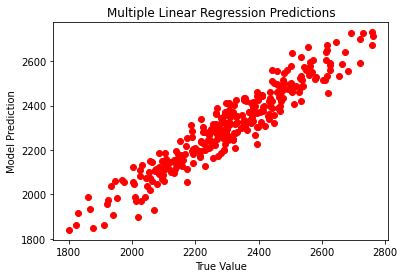

In [32]:
plt.scatter(y_test, y_pred, color = 'r')
plt.xlabel('True Value')
plt.ylabel('Model Prediction')
plt.title('Multiple Linear Regression Predictions')
plt.show()

In [33]:
k = x_test.shape[1]

In [34]:
n = len(x_test)

In [37]:
print('k=',k)
print('n=',n)

k= 2
n= 300


In [38]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [44]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [45]:
print('RMSE=', RMSE, '\nMSE=',MSE, '\nMAE=',MAE, '\nr2=',r2, '\nadj_r2=',adj_r2, '\nMAPE=',MAPE,'%')

RMSE= 59.72 
MSE= 3566.4909492778033 
MAE= 48.35515010770447 
r2= 0.9039829321280215 
adj_r2= 0.903336352546392 
MAPE= 2.1078550033796337 %


In [47]:
stock.head(2)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488


# STEP #6: VISUALIZE THE RESULTS

In [46]:
from mpl_toolkits.mplot3d import Axes3D

In [49]:
x_surf, y_surf = np.meshgrid( np.linspace(stock['Interest Rates'].min(), stock['Interest Rates'].max(), 100), np.linspace(stock['Employment'].min(), stock['Employment'].max(), 100))

In [50]:
x_surf.shape

(100, 100)

In [51]:
onlyx = pd.DataFrame({'Interest Rates': x_surf.ravel(), 'Employment': y_surf.ravel()})

In [52]:
onlyx.shape

(10000, 2)

In [53]:
y_fitted = regressor.predict(onlyx)

In [55]:
y_fitted.shape

(10000,)

In [57]:
y_fitted = y_fitted.reshape(x_surf.shape)

In [59]:
y_fitted.shape

(100, 100)

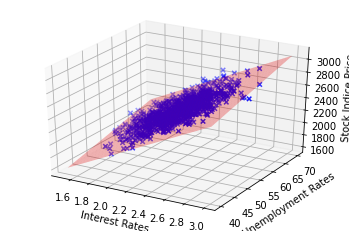

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(stock['Interest Rates'], stock['Employment'], stock['S&P 500 Price'], c= 'blue', marker = 'x')
ax.plot_surface(x_surf, y_surf, y_fitted, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock Indice Price')

plt.show()


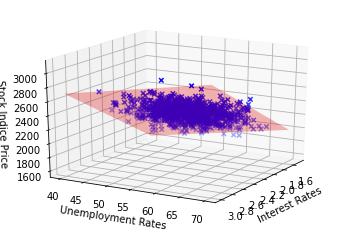

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(stock['Interest Rates'], stock['Employment'], stock['S&P 500 Price'], c= 'blue', marker = 'x')
ax.plot_surface(x_surf, y_surf, y_fitted, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock Indice Price')
ax.view_init(20,30)
plt.show()

In [66]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns = ['Coefficients'])

In [67]:
coeff_df

,Coefficients
Interest Rates,726.914105
Employment,12.310646


# EXCELLENT JOB! NOW YOU'RE FAMILIAR WITH MULTIPLE LINEAR REGRESSION